Here, we ensure that we can store arbitrary types as attribute values - not just strings - for efficiency.  The builtin serialization only works with strings, but supplying our own serialization isn't objectionable.

In [1]:
import domcat
import graphcat.notebook

In [2]:
graph = graphcat.StaticGraph()
graph.add_task("canvas", domcat.create_element("canvas", width=200, height=5.4, style="foo"))
graph.add_task("axes1", domcat.create_element("cartesian"))
graph.add_task("append1", domcat.append_element)
graph.add_links("canvas", ("append1", "parent"))
graph.add_links("axes1", ("append1", "child"))

graph.add_task("axes2", domcat.create_element("radial"))
graph.add_task("append2", domcat.append_element)
graph.add_links("append1", ("append2", "parent"))
graph.add_links("axes2", ("append2", "child"))

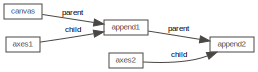

In [3]:
graphcat.notebook.display(graph)

In [4]:
domcat.dump(graph.output("append2"))

<canvas width="200" height="5.4" style="foo">
  <cartesian/>
  <radial/>
</canvas>


In [5]:
graph.output("append2").attrib["height"]

5.4

Here, we confirm that the attribute dictionary is shared between shallow-copied elements:

In [6]:
assert(id(graph.output("canvas").attrib) == id(graph.output("append1").attrib))

We also ensure that we can override attributes without modifying the upstream originals:

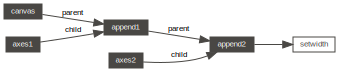

In [7]:
graph.add_task("setwidth", domcat.set_attribute("width", 300))
graph.add_links("append2", "setwidth")

graphcat.notebook.display(graph)


In [8]:
domcat.dump(graph.output("append2"))

<canvas width="200" height="5.4" style="foo">
  <cartesian/>
  <radial/>
</canvas>


In [9]:
domcat.dump(graph.output("setwidth"))

<canvas width="300" height="5.4" style="foo">
  <cartesian/>
  <radial/>
</canvas>


In [10]:
assert(id(graph.output("append2")) != id(graph.output("setwidth")))
assert(id(graph.output("append2").attrib) != id(graph.output("setwidth").attrib))

for lhs, rhs in zip(graph.output("append2"), graph.output("setwidth")):
    assert(id(lhs) == id(rhs))